# Fitness Classification Dataset - EDA and Preprocessing Pipelines

The objective of this notebook is to perform an Exploratory Data Analysis (EDA) on the Fitness Classification Dataset.

The goal is to identify whether individuals are fit (1) or not fit (0).

The dataset used is available at:
https://www.kaggle.com/datasets/muhammedderric/fitness-classification-dataset-synthetic?select=README.md

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer


In [53]:
data = pd.read_csv('data/fitness_dataset.csv')
data

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,F,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,F,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,M,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,yes,F,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,52,173,98,60.7,106.1,NaN,1.54,3.25,1,M,1
1996,61,186,74,51.4,123.8,9.4,8.63,3.15,no,M,1
1997,77,198,89,76.7,103.6,8.3,1.98,3.36,yes,M,0
1998,62,190,63,80.7,115.9,6.7,9.21,2.39,1,F,0


In [54]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        1840 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   str    
 9   gender             2000 non-null   str    
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(4), str(2)
memory usage: 172.0 KB


In total we have 11 columns:

age: Age of the individual in years (integer)

height_cm: Height in centimeters (integer)

weight_kg: Weight in kilograms (integer)

heart_rate: Resting heart rate in beats per minute (float)

blood_pressure: Systolic blood pressure in mmHg (float)

sleep_hours: Average hours of sleep per day (float)

nutrition_quality: Daily nutrition quality score between 0 and 10 (float)

activity_index: Physical activity level score between 1 and 5 (float)

smokes: Smoking status (mixed types: 0, 1, "yes", "no")

gender: Gender of individual, either 'M' or 'F'

is_fit: Target variable — 1 if the person is fit, 0 otherwise

As can be observed, there are 160 missing values in the sleephours column.

In [55]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2000.0,49.114000,17.926564,18.0,34.0000,49.000,65.000,79.00
height_cm,2000.0,174.533000,14.371750,150.0,162.0000,174.000,187.000,199.00
weight_kg,2000.0,83.540500,25.852534,30.0,64.0000,83.000,102.000,250.00
heart_rate,2000.0,70.288600,11.846339,45.0,62.1000,70.250,78.425,118.60
blood_pressure,2000.0,119.908850,14.578032,90.0,109.7000,120.000,129.800,171.20
sleep_hours,1840.0,7.513315,1.502031,4.0,6.5000,7.500,8.600,12.00
nutrition_quality,2000.0,5.035140,2.864156,0.0,2.5475,5.065,7.470,10.00
activity_index,2000.0,2.999040,1.136383,1.0,2.0375,2.980,3.950,4.99
is_fit,2000.0,0.399500,0.489918,0.0,0.0000,0.000,1.000,1.00


In the weight_kg column, very extreme values can be observed, with minimum values of 30 kg and maximum values of 250 kg.

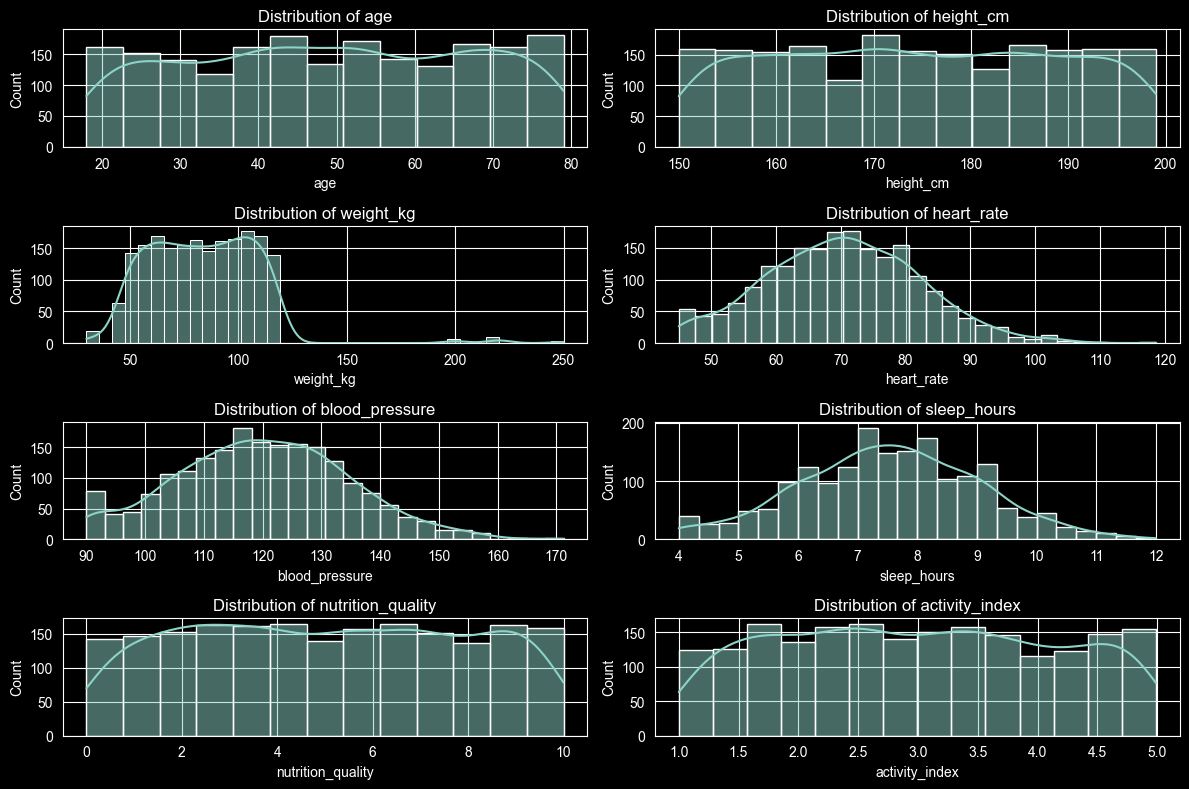

In [56]:
numerical_cols = ['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure','sleep_hours', 'nutrition_quality','activity_index','is_fit']

fig, axs = plt.subplots(4, 2, figsize=(12, 8))

for ax, col in zip(axs.ravel(), numerical_cols):
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

fig.tight_layout()


Practically, the data for age, height, nutrition, and activity have uniform distributions, while the data for weight, heart_rate, blood_pressure, and sleep_hours have normal distributions.

The numerical features have very different ranges, so it will be necessary to apply a scaler to avoid the dominance of features with large ranges.

Also, as mentioned earlier, weight has extreme values, so it is necessary to consider what to do with these.

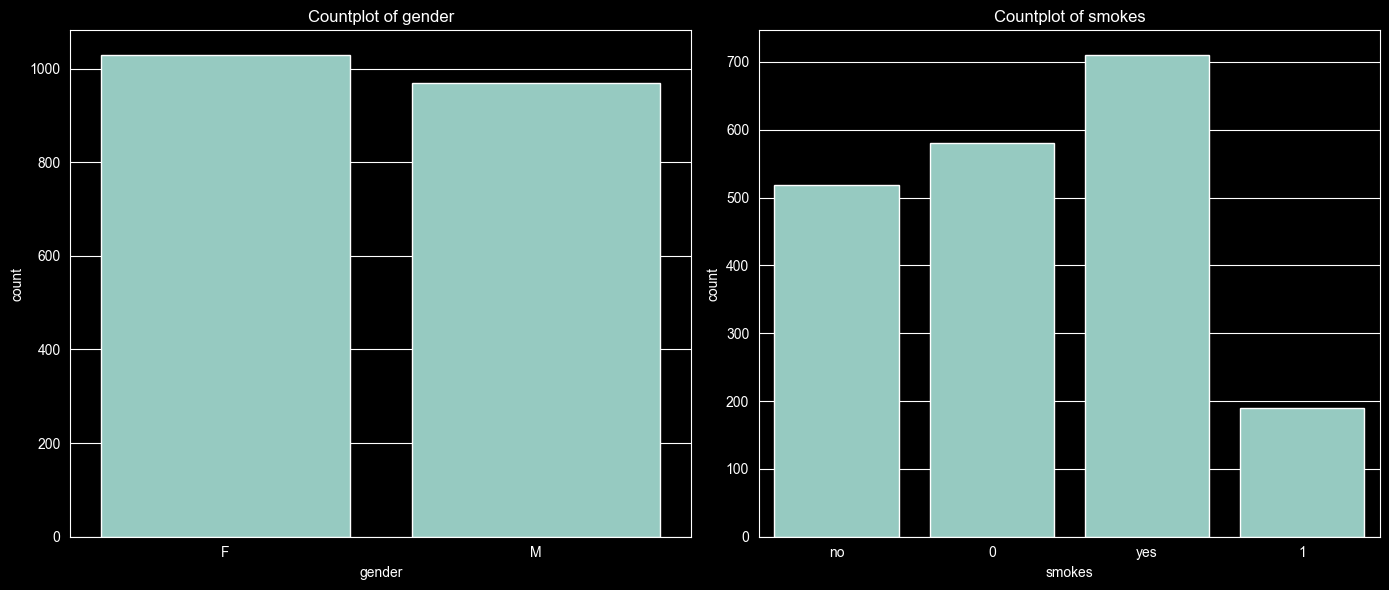

In [57]:
categorical_cols = ['gender','smokes']

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

for ax, col in zip(axs.ravel(), categorical_cols):
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(f'Countplot of {col}')

fig.tight_layout()

Regarding gender, a fairly balanced distribution can be observed, which is good for the model as it helps avoid producing any significant bias. On the other hand, in smokes, there is an issue where both string and numeric values exist, so it is necessary to perform data cleaning on these values.

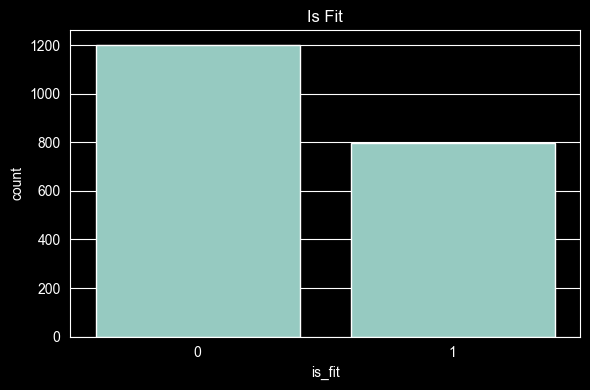

In [58]:
fig = plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='is_fit')
plt.title('Is Fit')
plt.tight_layout()

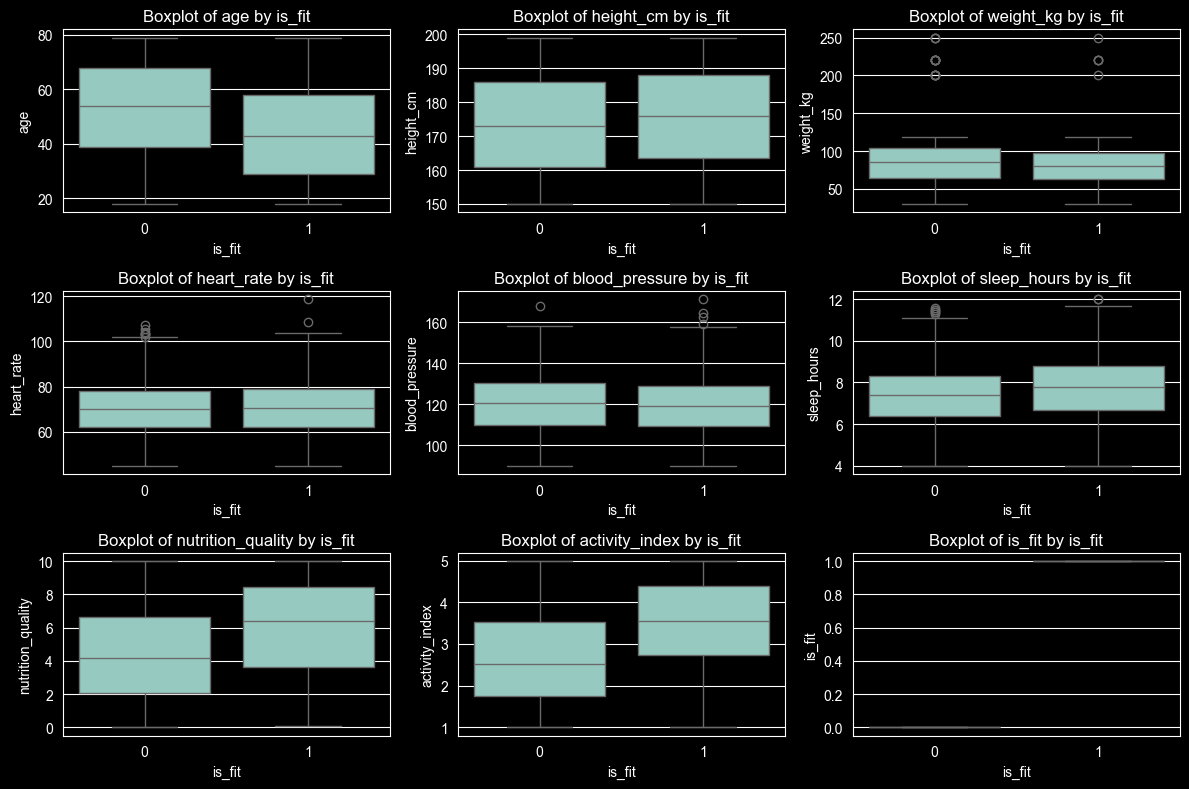

In [59]:
fig, axs = plt.subplots(3, 3, figsize=(12, 8))

for ax, col in zip(axs.ravel(), numerical_cols):
    sns.boxplot(data=data, x='is_fit', y=col, ax=ax)
    ax.set_title(f'Boxplot of {col} by is_fit')

fig.tight_layout()

Taking the plots into account, we can first observe that fit individuals are younger, with an approximate median close to 40. On the other hand, height does not seem to be very significant unless we calculate the body mass index (BMI); the same applies to weight.

It can also be noted that fit individuals sleep slightly more. Nutrition quality is a strong predictor, where fit individuals have higher nutritional quality, and the same pattern is observed for activity_index.

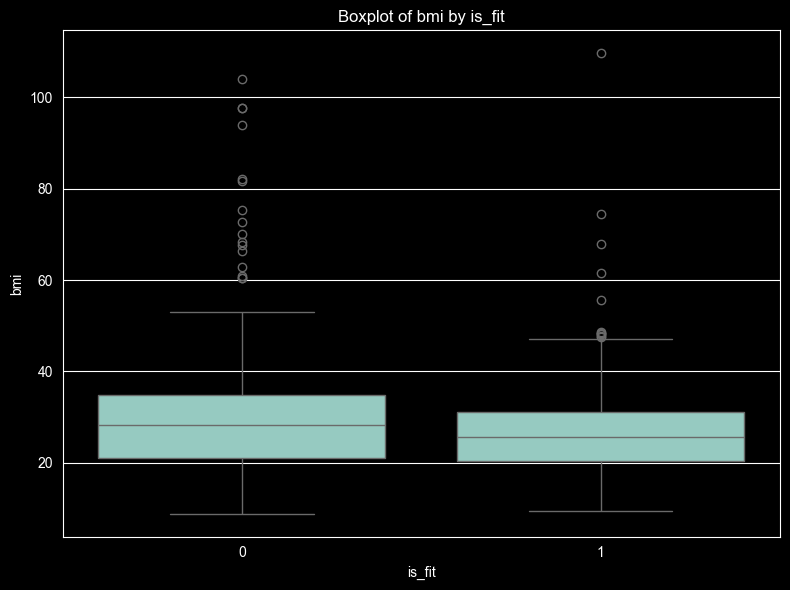

In [60]:

data['bmi'] = data['weight_kg'] / (data['height_cm']/100)**2

numerical_cols.append('bmi')



fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot(data=data, x='is_fit', y='bmi', ax=ax)
ax.set_title('Boxplot of bmi by is_fit')
fig.tight_layout()
plt.show()



BMI was created to be a more useful predictor.

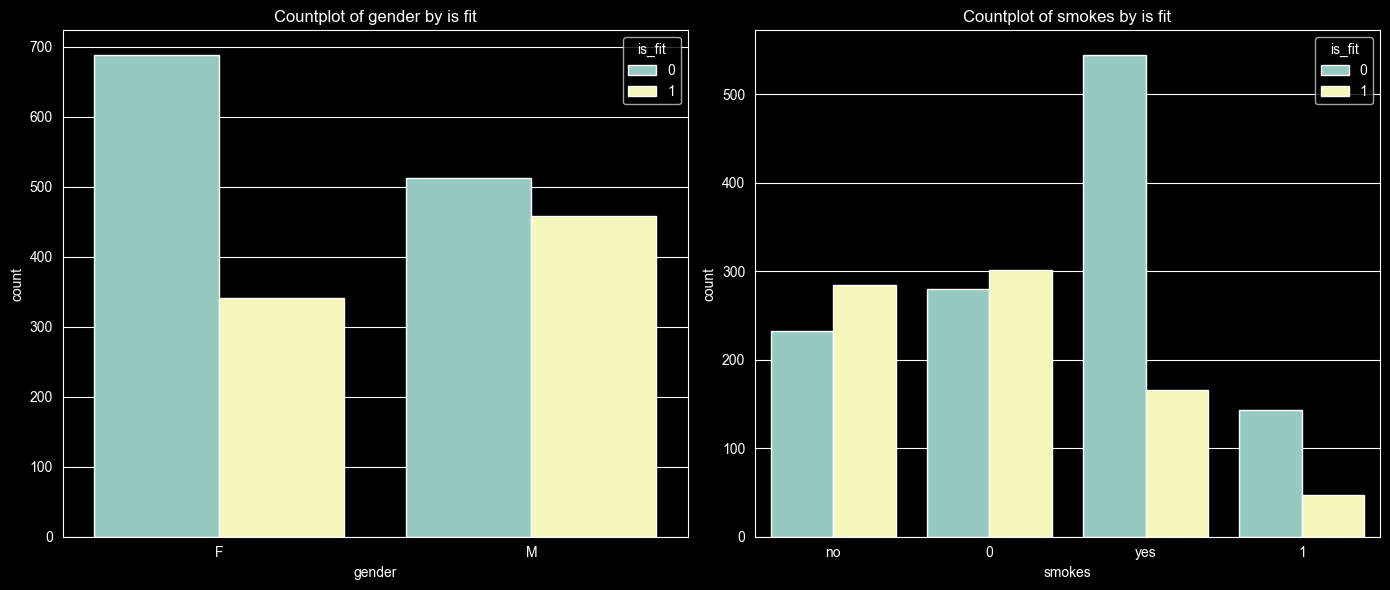

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
for ax, col in zip(axs.ravel(), categorical_cols):
    sns.countplot(data=data, x=col, hue='is_fit', ax=ax)
    ax.set_title(f'Countplot of {col} by is fit')

fig.tight_layout()

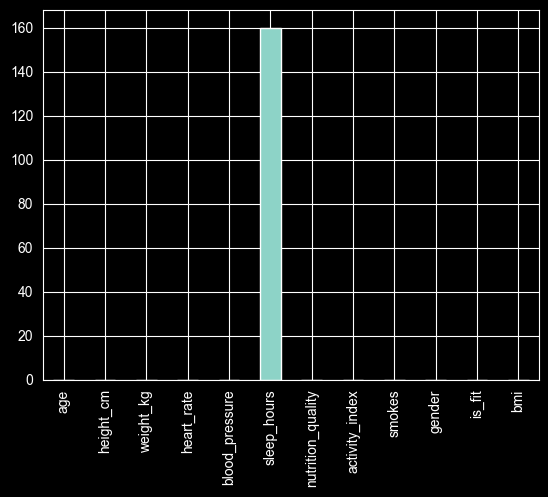

In [62]:
missing_counts = data.isnull().sum()
missing_counts.plot(kind='bar')

As mentioned earlier, there are missing values in the sleep_hours data.

In [63]:
missing_percent = data.isnull().mean() * 100
missing_percent.sort_values(ascending=False)

sleep_hours          8.0
age                  0.0
weight_kg            0.0
height_cm            0.0
heart_rate           0.0
blood_pressure       0.0
nutrition_quality    0.0
activity_index       0.0
smokes               0.0
gender               0.0
is_fit               0.0
bmi                  0.0
dtype: float64

The average sleep hours will be assigned to the missing values.

In [64]:
data['smokes'] = data['smokes'].replace({
    1: 'yes',
    '1': 'yes',
    0: 'no',
    '0': 'no'
})



In [65]:

preprocessing_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('cat', make_pipeline(OneHotEncoder()), ['gender', 'smokes']),
            ('num_missing', make_pipeline( SimpleImputer(strategy='mean'),StandardScaler()), ['sleep_hours']),
             ('num_complete', make_pipeline(StandardScaler() ), ['age', 'height_cm', 'weight_kg','heart_rate', 'blood_pressure', 'nutrition_quality', 'activity_index', 'bmi']),
        ],
        remainder='passthrough',
    )
)

The corresponding transformations were applied, such as OneHotEncoder on categorical columns, the missing values in sleep_hours were filled, and StandardScaler was added for the numerical features.

In [70]:
numerical_cols = ['age', 'height_cm', 'weight_kg', 'heart_rate',
                  'blood_pressure', 'sleep_hours', 'nutrition_quality',
                  'activity_index', 'bmi']

categorical_cols = ['gender', 'smokes']

In [71]:
x = data[numerical_cols + categorical_cols]
y = data['is_fit']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

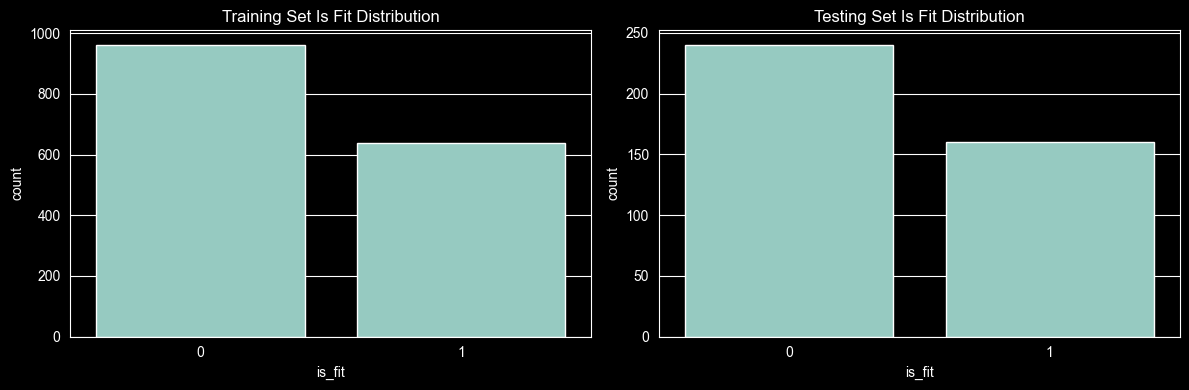

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x=y_train, ax=axs[0])
axs[0].set_title('Training Set Is Fit Distribution')
sns.countplot(x=y_test, ax=axs[1])
axs[1].set_title('Testing Set Is Fit Distribution')
fig.tight_layout()

In [73]:
x_train_processed = preprocessing_pipeline.fit_transform(x_train, y_train)
x_train_processed

array([[ 0.        ,  1.        ,  1.        , ...,  0.90865877,
         1.23626894, -0.66265963],
       [ 0.        ,  1.        ,  1.        , ..., -0.19582518,
         0.99071866,  1.90481384],
       [ 1.        ,  0.        ,  0.        , ...,  1.31028929,
         1.57828541, -1.05893982],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -0.76018531,
        -0.2107238 ,  1.47216146],
       [ 0.        ,  1.        ,  0.        , ...,  0.22657934,
         1.20119033,  0.09765317],
       [ 0.        ,  1.        ,  0.        , ...,  1.01945339,
        -0.62289749, -0.86632392]], shape=(1600, 13))

In [74]:
x_test_processed = preprocessing_pipeline.transform(x_test)
x_test_processed

array([[ 0.        ,  1.        ,  1.        , ...,  1.11639869,
         0.92056143, -0.57775016],
       [ 1.        ,  0.        ,  1.        , ...,  0.59704888,
         1.03456692, -1.55599729],
       [ 1.        ,  0.        ,  0.        , ..., -0.66670234,
        -0.53520096, -1.03566925],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.04715205,
        -0.34226859, -0.59771242],
       [ 0.        ,  1.        ,  1.        , ...,  0.87403545,
         0.8153256 , -1.04177956],
       [ 0.        ,  1.        ,  1.        , ...,  0.48279192,
        -0.24580241,  1.47266785]], shape=(400, 13))

In [75]:
classification_model = make_pipeline(
    preprocessing_pipeline,
    LogisticRegression()
)

In [76]:
classification_model

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('pipeline', ...), ('logisticregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthroug

In [77]:
classification_model.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('pipeline', ...), ('logisticregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthroug

In [78]:
y_test_pred = classification_model.predict(x_test)
y_test_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [79]:
x_test['IsFit_Predicted'] = y_test_pred
x_test['IsFit_Actual'] = y_test.values
x_test

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,bmi,gender,smokes,IsFit_Predicted,IsFit_Actual
1413,43,195,84,64.9,103.8,7.6,8.28,4.06,22.090730,M,no,1,1
1305,23,170,35,72.4,113.1,8.0,6.78,4.19,12.110727,F,no,1,1
294,79,166,48,57.0,117.9,4.5,3.13,2.40,17.419074,F,yes,0,0
512,71,164,111,58.4,126.0,7.0,9.38,2.15,41.270077,M,yes,0,0
771,66,164,117,48.9,126.6,NaN,3.38,1.41,43.500892,M,no,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,41,159,98,65.8,96.7,NaN,4.86,2.66,38.764289,M,yes,0,0
246,20,166,91,71.6,102.3,7.0,3.16,2.31,33.023661,M,no,1,0
1338,66,171,64,89.0,120.3,6.5,8.08,2.62,21.887076,F,yes,0,0
157,29,189,62,74.1,109.8,9.0,7.58,3.94,17.356737,M,no,1,1
